In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'dataset')
OUTPUT_DIR = os.path.join(os.getcwd(), 'output')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
train_features = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
train_labels = pd.read_csv(os.path.join(DATA_DIR, 'target.csv'))
test_features = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
train_features.columns = train_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)
test_features.columns = test_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)

In [4]:
train_features['downloads'].unique()

array([nan, '50 - 100', '50000000 - 100000000', '1000 - 5000', '1 - 5',
       '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '1 - 1', '5000000 - 10000000', '10 - 1',
       '100000000 - 500000000', '5 - 1', '10000000000 - 15000000000',
       '500 - 1', '500000000 - 1000000000', '1000000000 - 5000000000',
       '50 - 1'], dtype=object)

In [5]:
# Melihat struktur data
print("Ukuran data train features:", train_features.shape)
print("Ukuran data train labels:", train_labels.shape)
print("Ukuran data test features:", test_features.shape)

Ukuran data train features: (7000, 16)
Ukuran data train labels: (7000, 1)
Ukuran data test features: (3000, 17)


In [6]:
# Melihat beberapa baris pertama dari data
train_features.describe(include='all')

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
count,7000,6936,7.000000e+03,7000,4851,7000,6250,2365,2365,5872.000000,1.321000e+03,6950.000000,5768.000000,838,7000,7000
unique,114,119,NaN,46,26,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3
top,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low
freq,4338,5802,NaN,1828,699,6045,6189,1424,1424,NaN,NaN,NaN,NaN,536,5652,6983
mean,NaN,NaN,3.256274e+04,NaN,NaN,NaN,NaN,NaN,NaN,45.740293,3.977563e+03,57.093060,2.482490,NaN,NaN,NaN
std,NaN,NaN,5.501431e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.361215,9.219919e+04,37.169895,1.905712,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.038525e-03,0.533333,0.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.086920e+00,27.533333,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.945580e+00,52.866667,3.000000,NaN,NaN,NaN
75%,NaN,NaN,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,4.908375e+01,80.000000,4.000000,NaN,NaN,NaN


In [7]:
# Melihat beberapa baris pertama dari data
# test_features['appAge'] += 1.2
test_features.describe()

,ID,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,3000.000000,3.000000e+03,2560.000000,574.000000,2983.000000,2486.000000
mean,5016.298333,3.576905e+04,46.444922,286.612276,56.044396,2.490748
std,2894.991128,4.455556e+05,49.415285,1890.997697,36.417410,1.896230
min,1.000000,0.000000e+00,0.000000,0.007450,-1.200000,0.000000
25%,2495.750000,0.000000e+00,0.000000,1.121507,26.933333,0.000000
50%,4969.500000,1.000000e+00,0.000000,7.186537,51.933333,3.000000
75%,7585.500000,8.250000e+01,99.000000,44.878463,77.750000,4.000000
max,9999.000000,1.319941e+07,99.000000,37542.779693,194.466667,5.000000


In [8]:
train_features['developerCountry'].unique()

array(['NORWAY', 'ADDRESS NOT LISTED IN PLAYSTORE',
       'UNITED ARAB EMIRATES', 'GERMANY', 'CANNOT IDENTIFY COUNTRY',
       'FINLAND', 'SINGAPORE', 'UNITED STATES', 'REPUBLIC OF KOREA',
       'MONGOLIA', 'PAKISTAN', 'VIET NAM', 'OMAN', 'FRANCE', 'INDIA',
       'CHINA', 'NETHERLANDS', 'RUSSIAN FEDERATION', 'INDONESIA', 'ITALY',
       'UZBEKISTAN', 'UNITED KINGDOM', 'CANADA', 'NEW ZEALAND',
       'SRI LANKA', 'AUSTRALIA', "COTE D'IVOIRE", 'IRELAND', 'KAZAKHSTAN',
       'HONG KONG', 'CHILE', 'BAHRAIN', 'JAPAN', 'SWITZERLAND', 'ISRAEL',
       'SPAIN', 'TURKEY', 'ESTONIA', 'SWEDEN', 'DOMINICAN REPUBLIC',
       'AUSTRIA', 'MALAYSIA', 'POLAND', 'CYPRUS', 'UKRAINE',
       'ISLE OF MAN', 'ARGENTINA', 'BANGLADESH', 'ICELAND', 'JORDAN',
       'MOROCCO', 'PERU', 'NIGER', 'BULGARIA', 'ROMANIA', 'SLOVENIA',
       'SOUTH AFRICA', 'KENYA', 'NIGERIA', 'ALBANIA', 'CZECH REPUBLIC',
       'SAUDI ARABIA', 'PANAMA', 'ANDORRA', 'THAILAND', 'MALTA',
       'VENEZUELA', 'GREECE', 'YEMEN', 'EGYPT

In [9]:
# Menggunakan bitwise OR
train_features['is_not_listed'] = (
    (train_features['developerCountry'] == 'ADDRESS NOT LISTED IN PLAYSTORE') |
    (train_features['developerCountry'] == 'CANNOT IDENTIFY COUNTRY')
).astype(int)

test_features['is_not_listed'] = (
    (test_features['developerCountry'] == 'ADDRESS NOT LISTED IN PLAYSTORE') |
    (test_features['developerCountry'] == 'CANNOT IDENTIFY COUNTRY')
).astype(int)

# Nilai yang akan digabung menjadi 'unknown'
elem_to_group = [
    'CANNOT IDENTIFY COUNTRY',
    'ADDRESS NOT LISTED IN PLAYSTORE'
]

# Mengganti nilai di kolom developerCountry pada kedua DataFrame
for df in (train_features, test_features):
    df.loc[df['developerCountry'].isin(elem_to_group), 'developerCountry'] = 'unknown'

In [10]:
print("\nSampel data train labels:")
print(train_labels.head())


Sampel data train labels:
   coppaRisk
0      False
1      False
2      False
3      False
4      False


In [11]:
## Penanganan Missing Values
# Mengganti string kosong dengan NaN
train_features.replace('', np.nan, inplace=True)
test_features.replace('', np.nan, inplace=True)

In [12]:
# Memeriksa missing values
missing_percentage = train_features.isnull().mean() * 100
print("\nPersentase missing values per kolom:")
print(missing_percentage.sort_values(ascending=False))


Persentase missing values per kolom:
appContentBrandSafetyRating        88.028571
adSpent                            81.128571
hasTermsOfServiceLinkRating        66.214286
hasTermsOfServiceLink              66.214286
downloads                          30.700000
averageUserRating                  17.600000
isCorporateEmailScore              16.114286
hasPrivacyLink                     10.714286
countryCode                         0.914286
appAge                              0.714286
mfaRating                           0.000000
appDescriptionBrandSafetyRating     0.000000
developerCountry                    0.000000
deviceType                          0.000000
primaryGenreName                    0.000000
userRatingCount                     0.000000
is_not_listed                       0.000000
dtype: float64


In [13]:
# # 2. Preprocessing helper: parse download ranges
# def parse_downloads(x):
#     if pd.isna(x) or not isinstance(x, str) or '-' not in x:
#         return np.nan
#     lo, hi = x.split('-')
#     try:
#         lo = int(lo.replace(",", "").strip())
#         hi = int(hi.replace(",", "").strip())
#         return (lo + hi) / 2
#     except:
#         return np.nan

# # 3. Compute group priors for boolean/categorical
# def compute_group_priors(df, group_cols, target_col):
#     # Returns a DataFrame with group priors for True and mode for categorical
#     agg_funcs = {}
#     agg_funcs['prior_true'] = lambda s: s.eq(True).mean() if pd.api.types.is_bool_dtype(s) else np.nan
#     agg_funcs['mode_cat'] = lambda s: s.mode().iloc[0] if len(s.dropna())>0 and not pd.api.types.is_bool_dtype(s) else np.nan
#     priors = df.groupby(group_cols)[target_col].agg(**agg_funcs).reset_index()
#     return priors

# # 4. Imputation pipeline
# def impute_features(df):
#     df = df.copy()

#     # Numeric conversions
#     df['Downloads_num'] = df['downloads'].apply(parse_downloads)

#     # averageUserRating: apps with zero ratings get neutral score, then fill remaining missing with median
#     mask_zero = (df['userRatingCount'] == 0) & (df['averageUserRating'].isna())
#     df.loc[mask_zero, 'averageUserRating'] = 3.0
#     df['averageUserRating'] = df['averageUserRating'].fillna(df['averageUserRating'].median())

#     # Other numerical fills
#     df['adSpent'] = df['adSpent'].fillna(0)
#     df['appAge'] = df['appAge'].fillna(df['appAge'].median())
#     df['isCorporateEmailScore'] = df['isCorporateEmailScore'].fillna(df['isCorporateEmailScore'].mean())

#     # Prepare grouping columns
#     grp_cols = ['countryCode', 'primaryGenreName']

#     # hasPrivacyLink imputation based on group prior
#     pl_priors = compute_group_priors(df, grp_cols, 'hasPrivacyLink')
#     df = df.merge(pl_priors, on=grp_cols, how='left')
#     df['hasPrivacyLink'] = df['hasPrivacyLink'].fillna(df['prior_true'].ge(0.5))

#     # hasTermsOfServiceLink imputation based on group prior
#     tos_priors = compute_group_priors(df, grp_cols, 'hasTermsOfServiceLink')
#     df = df.merge(tos_priors, on=grp_cols, how='left', suffixes=(None, '_tos'))
#     df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna(df['prior_true_tos'].ge(0.5))

#     # hasTermsOfServiceLinkRating: rule-based then group mode
#     df['hasTermsOfServiceLinkRating'] = np.where(
#         df['hasTermsOfServiceLink'] == False,
#         'none',
#         df['hasTermsOfServiceLinkRating']
#     )
#     mode_tos = tos_priors.rename(columns={'mode_cat': 'mode_tos'})
#     df = df.merge(mode_tos[grp_cols + ['mode_tos']], on=grp_cols, how='left')
#     df['hasTermsOfServiceLinkRating'] = df['hasTermsOfServiceLinkRating'].fillna(df['mode_tos'])

#     # Fallback for countries
#     df['developerCountry'] = df['developerCountry'].fillna('ADDRESS NOT LISTED IN PLAYSTORE')
#     df['countryCode'] = df['countryCode'].fillna('GLOBAL')

#     # Drop helper columns
#     help_cols = [c for c in ['prior_true','mode_cat','prior_true_tos','mode_tos', 'mode_cat_tos'] if c in df]
#     df = df.drop(columns=help_cols)

#     return df
# train_idx = list(train_features.index)
# test_idx = list(test_features.index)

# # Add identifier
# train_features['is_train'] = True
# test_features['is_train'] = False

# # Combine
# all_df = pd.concat([train_features, test_features], axis=0)

# # Impute on combined
# all_imp = impute_features(all_df)

# # Split back
# train_features = all_imp[all_imp['is_train']].drop(columns=['is_train'])
# test_features  = all_imp[~all_imp['is_train']].drop(columns=['is_train'])

# # Reindex to original
# train_features.index = train_idx
# test_features.index  = test_idx

In [14]:
# Menghapus fitur dengan missing values lebih dari 30%
threshold = 50
high_missing_cols = missing_percentage[missing_percentage > threshold].index
print(f"\nKolom dengan missing values lebih dari {threshold}%:")
print(high_missing_cols.tolist())


Kolom dengan missing values lebih dari 50%:
['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating', 'adSpent', 'appContentBrandSafetyRating']


In [15]:
# Menghapus fitur dengan missing values tinggi
train_features_cleaned = train_features.drop(columns=high_missing_cols)
test_features_cleaned = test_features.drop(columns=high_missing_cols)

print("\nUkuran data train setelah menghapus kolom dengan missing values tinggi:", train_features_cleaned.shape)


Ukuran data train setelah menghapus kolom dengan missing values tinggi: (7000, 13)


In [16]:
## Preprocessing Data
# Memeriksa missing values yang tersisa
missing_percentage_after = train_features_cleaned.isnull().mean() * 100
print("\nPersentase missing values per kolom setelah pembersihan:")
print(missing_percentage_after.sort_values(ascending=False))


Persentase missing values per kolom setelah pembersihan:
downloads                          30.700000
averageUserRating                  17.600000
isCorporateEmailScore              16.114286
hasPrivacyLink                     10.714286
countryCode                         0.914286
appAge                              0.714286
developerCountry                    0.000000
userRatingCount                     0.000000
primaryGenreName                    0.000000
deviceType                          0.000000
appDescriptionBrandSafetyRating     0.000000
mfaRating                           0.000000
is_not_listed                       0.000000
dtype: float64


In [17]:
# import pandas as pd
# from sklearn.preprocessing import PowerTransformer
# train_idx = train_features.index
# test_idx = test_features.index

# # Tambahkan label untuk membedakan data pelatihan dan pengujian
# train_features['is_train'] = True
# test_features['is_train'] = False

# # Gabungkan dataset
# all_df = pd.concat([train_features, test_features], axis=0)

# # Identifikasi fitur numerik (float dan int)
# numeric_cols = ['appAge']

# # Terapkan transformasi Box-Cox
# pt = PowerTransformer(method='yeo-johnson', standardize=True)
# all_df['appAge'] = pt.fit_transform(all_df[numeric_cols])

# # Pisahkan kembali dataset berdasarkan label 'is_train'
# train_features = all_df[all_df['is_train']].drop(columns=['is_train'])
# test_features = all_df[~all_df['is_train']].drop(columns=['is_train'])

# # Kembalikan indeks asli
# train_features.index = train_idx
# test_features.index = test_idx

In [18]:
# 1) Gabungkan train & test untuk perhitungan
combined = pd.concat(
    [train_features_cleaned, test_features_cleaned],
    axis=0,
    ignore_index=True
)

# 2) Hitung median untuk numeric dan mode untuk categorical dari 'combined' dan simpan dalam dict agar bisa pakai ulang
median_values = {}
for col in combined.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'ID':
        median_values[col] = combined[col].median()

mode_values = {}
for col in combined.select_dtypes(include=['object', 'category']).columns:
    # .mode() bisa menghasilkan Series, ambil elemen pertama
    if col != 'ID':
        mode_values[col] = combined[col].mode()[0]

In [19]:
# 3) Isi missing values di train & test
for col, med in median_values.items():
    train_features_cleaned[col].fillna(med, inplace=True)
    test_features_cleaned[col].fillna(med, inplace=True)

for col, mod in mode_values.items():
    train_features_cleaned[col].fillna(mod, inplace=True)
    test_features_cleaned[col].fillna(mod, inplace=True)

C:\Users\Warge\AppData\Local\Temp\ipykernel_33012\2355159081.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_features_cleaned[col].fillna(med, inplace=True)
C:\Users\Warge\AppData\Local\Temp\ipykernel_33012\2355159081.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = train_features_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    # Gabungkan, lalu paksa jadi string
    combined = pd.concat(
        [train_features_cleaned[col], test_features_cleaned[col]],
        axis=0
    ).astype(str)

    le.fit(combined)  # kelas diambil dari 'combined' yang sudah seragam
    train_features_cleaned[col] = le.transform(train_features_cleaned[col].astype(str))
    test_features_cleaned[col]  = le.transform(test_features_cleaned[col].astype(str))

In [21]:
## Membagi Data dan Melatih Model
# Membagi data menjadi training dan validation set
from xgboost import XGBClassifier
# col = ['appAge',
# 'primaryGenreName',
# 'userRatingCount',
# 'developerCountry',
# 'downloads',
# 'countryCode',
# 'averageUserRating',
# 'appDescriptionBrandSafetyRating',
# 'isCorporateEmailScore',
# 'deviceType']

X_train, X_val, y_train, y_val = train_test_split(
    train_features_cleaned, train_labels.iloc[:, 0], 
    test_size=0.2, random_state=42, stratify=train_labels.iloc[:, 0]
)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state':34
}
# Melatih model RandomForestClassifier
model = XGBClassifier(**xgb_params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=34, ...)

In [22]:
## Evaluasi Model
# Mendapatkan prediksi probabilitas dan kelas
y_val_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilitas kelas positif
y_val_pred = model.predict(X_val)

In [23]:
# Mengevaluasi model
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


ROC AUC Score: 0.8994
Accuracy: 0.9057


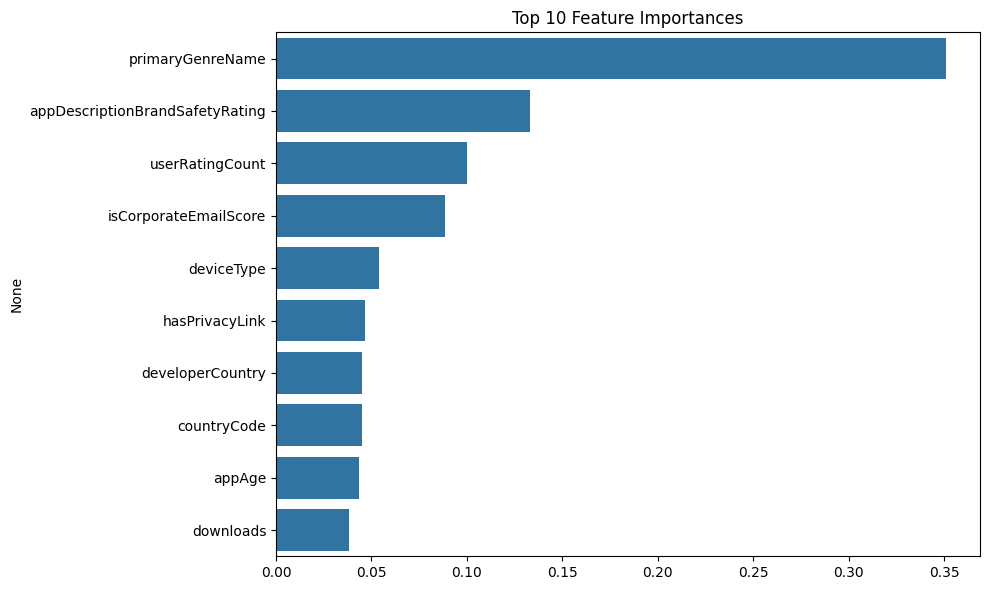

In [24]:
## Analisis Feature Importance
# Mendapatkan feature importance
feature_importance = model.feature_importances_
feature_names = train_features_cleaned.columns

# Menampilkan feature importance
plt.figure(figsize=(10, 6))
importances = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [25]:
train_features_cleaned.columns

Index(['developerCountry', 'countryCode', 'userRatingCount',
       'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink',
       'isCorporateEmailScore', 'appAge', 'averageUserRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'is_not_listed'],
      dtype='object')

In [26]:
import optuna
from optuna.samplers import TPESampler

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
def objective(trial):

    param = {
        "verbosity": 0,
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    try_model = XGBClassifier(**param, random_state=34, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000,device="cuda")
    try_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_pred = try_model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)


In [28]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [29]:
# study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=100)

In [30]:
# #evaluate the trial
# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

In [31]:
# tuned_param = trial.params
tuned_param ={
    "booster": "gbtree",
    "lambda": 0.05799968479692583,
    "alpha": 5.473863772259079e-08,
    "subsample": 0.8972019202526338,
    "colsample_bytree": 0.941676378244722,
    "max_depth": 9,
    "min_child_weight": 10,
    "eta": 0.09697196888267962,
    "gamma": 0.5318824820992001,
    "grow_policy": "depthwise"
}
fin_model = XGBClassifier(**tuned_param, random_state=34, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000,device="cuda")

In [32]:
fin_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = fin_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9046


c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:07:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [34]:
## Prediksi dan Pembuatan File Submission

# Prediksi pada data test
if 'ID' in test_features_cleaned.columns:
    id_test = test_features_cleaned['ID']
    test_features_cleaned = test_features_cleaned.drop(columns=['ID'])
test_predictions_proba = fin_model.predict_proba(test_features_cleaned)[:, 1]
test_predictions = fin_model.predict(test_features_cleaned)

# Mengonversi prediksi boolean ke string untuk format submission
test_predictions_str = ["True" if pred else "False" for pred in test_predictions]

# Membuat submission file
submission = pd.DataFrame({
    'ID': id_test,
    'coppaRisk': test_predictions_proba
})

# Melihat format submission
print("\nFormat submission:")
print(submission.head())

submission.to_csv('submission23.csv', index=False)

print("\nFile submission telah dibuat.")


Format submission:
     ID  coppaRisk
0  2807   0.080378
1  1742   0.193963
2   806   0.282826
3  2635   0.089021
4  9047   0.081062

File submission telah dibuat.
